### **Hypothesis Testing - Insurance Data (Core)**

We have been asked to use our hypothesis testing skills to answer the following questions:
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges on average?

For each question, make sure to:
- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis
- Show a supporting visualization that helps display the result

#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
# Load and read data file
df = pd.read_csv('Data/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### **Q1. Do smokers have higher insurance charges than non-smokers?**

#### **State the Hypothesis & Null Hypothesis**

[Null Hypothesis] = There is no significant difference between the insurance charges for smokers vs. non-smokers.

[Alternative Hypothesis] = There is a significant difference between the insurance charges for smokers vs. non-smokers.

#### **Select the correct test according to the data type and number of samples**

 - The appropriate test to perform would be:
    - Since we are measuring a numeric quantity - i.e. insurance charges
    - and we are comparing 2 groups/samples.
    - We therefore want to perform a 2-sample t-test, A.K.A. an independent t-test.

According to the workflow, the 2-sample T-Test has the following assumptions:
- No significant outliers
- Normality
- Equal Variance

In [3]:
# Perform test based on data type and number of samples
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [4]:
# Separate the data into two groups (“smoker” & “non-smoker”)
smokers_df = df.loc[df['smoker']=='yes']
non_smokers_df = df.loc[df['smoker']=='no']

print(f"There are {len(smokers_df)} Smokers." )
print(f"There are {len(non_smokers_df)} Non-Smokers." )

There are 274 Smokers.
There are 1064 Non-Smokers.


### **Visualize & Separate Data for Hypothesis**

In [5]:
# Filtering out charges for smokers
smokers_df_charges = smokers_df['charges']

In [6]:
smokers_df_charges.head(10)

0     16884.92400
11    27808.72510
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
34    51194.55914
38    39774.27630
39    48173.36100
Name: charges, dtype: float64

In [7]:
smokers_df_charges.info()

<class 'pandas.core.series.Series'>
Int64Index: 274 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [8]:
# Filtering out charges for non-smokers
non_smokers_df_charges = non_smokers_df['charges']

In [9]:
non_smokers_df_charges.head(10)

1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
Name: charges, dtype: float64

In [10]:
non_smokers_df_charges.info()

<class 'pandas.core.series.Series'>
Int64Index: 1064 entries, 1 to 1336
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1064 non-null   float64
dtypes: float64(1)
memory usage: 16.6 KB


In [11]:
## Concatenate the two dataframes for visualziation
plot_df = pd.concat([smokers_df_charges, non_smokers_df_charges], axis=0)
plot_df

0       16884.9240
11      27808.7251
14      39611.7577
19      36837.4670
23      37701.8768
           ...    
1332    11411.6850
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
Name: charges, Length: 1338, dtype: float64

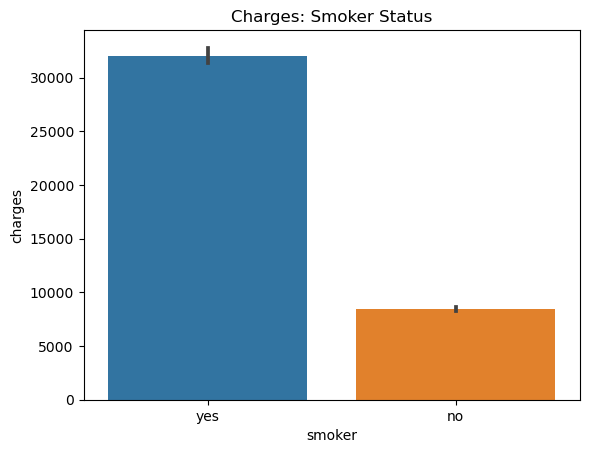

In [12]:
# Visualizing means. ci=68 makes it easier to compare error bars 
ax = sns.barplot(data=df, x='smoker', y='charges', errorbar=('ci', 68))
ax.set_title("Charges: Smoker Status");

#### **Testing Assumptions:**

- No significant outliers
- Normality
- Equal Variance

#### **Check for Outliers**

In [13]:
# Checking for abs value of z-scores that are > 3
outliers_smokers = np.abs(stats.zscore(smokers_df_charges)) > 3

print(f"There are {outliers_smokers.sum()} outliers in the Smokers group out of {len(smokers_df_charges)})")

There are 0 outliers in the Smokers group out of 274)


In [14]:
# Checking for abs value of z-scores that are > 3
outliers_non_smokers = np.abs(stats.zscore(non_smokers_df_charges)) > 3

print(f"There are {outliers_non_smokers.sum()} outliers in the Non-Smokers group out of {len(non_smokers_df_charges)})")

There are 24 outliers in the Non-Smokers group out of 1064)


#### **Remove Outliers**

In [15]:
## Remove outliers from non-smokers group
non_smokers_df_charges = non_smokers_df_charges.loc[~outliers_non_smokers]
non_smokers_df_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### **Test for Normality**

In [16]:
# Check smokers group for normality
result_smokers = stats.normaltest(smokers_df_charges)

print(f'p value = {result_smokers.pvalue}')
print(f'n = {len(smokers_df_charges)}')
print(f'p value < than 0.05? {result_smokers.pvalue<.05}')

p value = 5.564930630036463e-14
n = 274
p value < than 0.05? True


In [17]:
# Check non-smokers group for normality
result_non_smokers = stats.normaltest(non_smokers_df_charges)

print(f'p value = {result_non_smokers.pvalue}')
print(f'n = {len(non_smokers_df_charges)}')
print(f'p value < than 0.05? {result_non_smokers.pvalue<.05}')

p value = 2.6945416315543976e-36
n = 1040
p value < than 0.05? True


- In results the groups are large enough to safely disregard the assumption of normality.

#### **Test for Equal Variances**

In [18]:
## Use Levene's test for equal variance
result = stats.levene(non_smokers_df_charges, smokers_df_charges)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [19]:
## Interpret the p-value
if result.pvalue < .05:
    print(f"The groups DO NOT have equal variance")
else:
    print(f"The groups DO have equal variance")

The groups DO NOT have equal variance


- The assumption of normality was met but the assumption of equal variance was NOT met. 
- A Welch's T-test will therefore be used by adding `equal_var=False` to `stats.ttest_ind`

In [20]:
t_stat, p_value_welch = ttest_ind(smokers_df_charges, non_smokers_df_charges, equal_var=False)

print(f'Welch\'s T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value_welch:.10f}')

Welch's T-statistic: 33.7323
P-value: 0.0000000000


In [21]:
# Display results
print(f'P-value: {p_value_welch:.4f}')

# Interpretation
if p_value_welch < 0.05:
    print("Reject the null hypothesis.")
    print("There is significant evidence to suggest that Smokers have significantly higher insurance charges than Non-Smokers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in insurance charges between Smokers and Non-Smokers.")

P-value: 0.0000
Reject the null hypothesis.
There is significant evidence to suggest that Smokers have significantly higher insurance charges than Non-Smokers.


In [22]:
print(f'The mean of the charges charged for the Non-Smokers group: {non_smokers_df_charges.mean()}')
print(f'The mean of the charges charged for the Smokers group: {smokers_df_charges.mean()}')

The mean of the charges charged for the Non-Smokers group: 7939.8608446721155
The mean of the charges charged for the Smokers group: 32050.23183153284


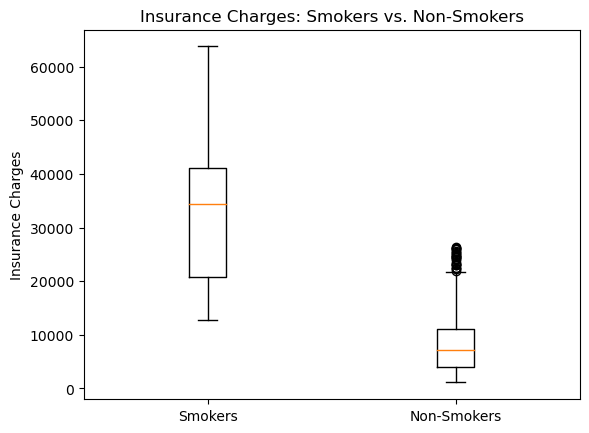

In [23]:
plt.boxplot([smokers_df_charges, non_smokers_df_charges], labels=['Smokers', 'Non-Smokers'])
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges: Smokers vs. Non-Smokers')
plt.show()

#### **Q2. Are Men more likely to smoke than Women?**

#### **Create the necessary group variables**

In [24]:
smokers = df.loc[df['smoker']=='yes']
non_smokers = df.loc[df['smoker']=='no']

smoker_males = smokers['sex']=='male'
smoker_females = non_smokers['sex']=='female'

#### **State the Hypothesis & Null Hypothesis**

[Null Hypothesis] = There is no significant indication that Men are more likely to smoke than Women.

[Alternative Hypothesis] = There is a significant indication that Men are more likely to smoke than Women.

#### **Select the correct test according to the data type and number of samples**

 - The appropriate test to perform would be:
    - Since we are measuring categorical data
    - and we are comparing 2 groups/samples.
    - We therefore want to perform a Chi-Square

According to the workflow, the assumptions for categorical data:
- The outcome is binary
- The observations are independant

### **Visualize & Separate Data for Hypothesis**

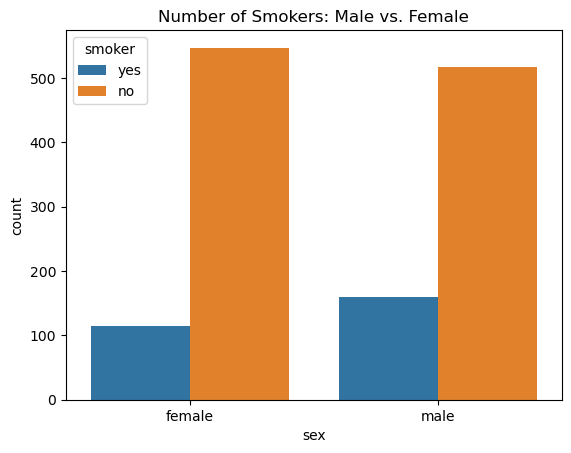

In [25]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers: Male vs. Female");

#### Create a contingency tabel for the Chi-Squared Test

In [26]:
# Calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [27]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

# Return details of the p-value?
print(f'p = {p}')
print (f'Significant result: {p<.05}')

p = 0.006548143503580696
Significant result: True


- The p-value is less than 0.05
- Hence the Null Hypothesis is rejected - as there is a significant indication that Men are more likely to smoke than Women.
- Based on the model results - the Alternative Hypothesis is accepted.

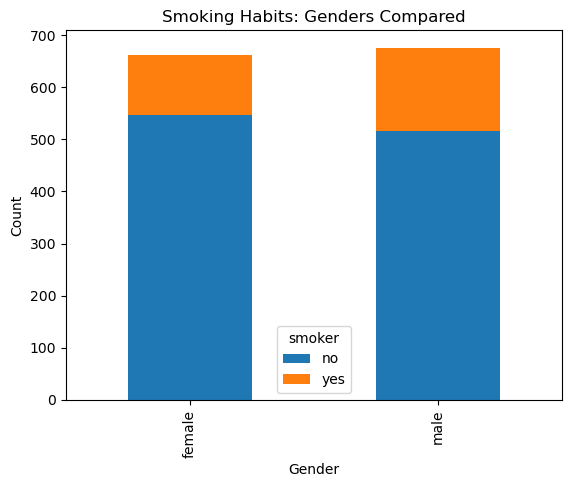

In [28]:
table.plot(kind='bar', stacked=True)
plt.title('Smoking Habits: Genders Compared')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### **Q3. Do different regions have different charges, on average?**

#### **State the Hypothesis & Null Hypothesis**

[Null Hypothesis] = There is no significant indication that Regions have different charges on average.

[Alternative Hypothesis] = There is a significant indication that different Regions have different charges on average.

#### **Select the correct test according to the data type and number of samples**

 - The appropriate test to perform would be:
    - Since we are measuring numerical data
    - And we are comparing more than 2 groups/samples
    - We therefore want to perform an ANOVA

According to the workflow, the 2-sample T-Test has the following assumptions:
- Normality
- Equal Variance
- No significant outliers

In [29]:
# Create groups dictionary
groups = {}

# Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
    
groups.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### **Testing Assumptions**

In [30]:
# Running normal test on each group and confirming there are e.g. >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
    
# Convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [31]:
# Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- As confirmed by the Tests - each of the Groups has a normal state.

#### **Testing Assumption of Equal Variance**

In [32]:
# Perform Levene test 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- The assumption of Equal Variance was met.

#### **One-Way ANOVA Test**

In [33]:
# Perform the correct hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

- The p-value is much less than 0.05, so we have a Significant result.
- The p-value of 0.03089 is less than the commonly used significance level of 0.05.
- Therefore the Null Hypothesis is rejected.

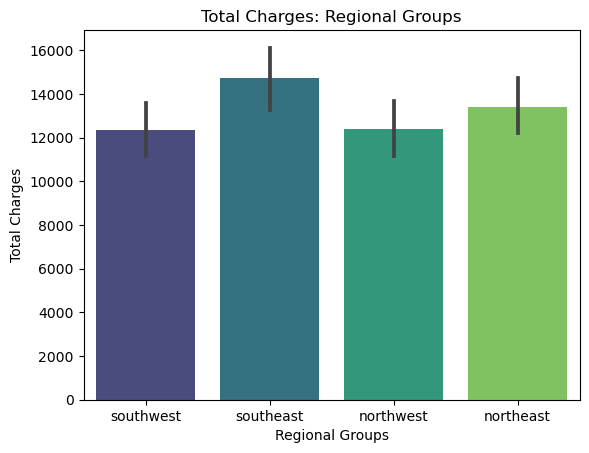

In [34]:
# Use Seaborn to create a histogram
sns.barplot(x='region', y='charges', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Regional Groups')
plt.ylabel('Total Charges')
plt.title('Total Charges: Regional Groups')

# Display the plot
plt.show()

- Conclusion and summary remarks:
  - Significant evidence exist to suggest that average Insurance Charges vary accross different Regions.
  - One or more Regions have different Insurance Charges - if compared to the rest.